# Insurance Claim Fraud Detection

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('Insurance_Claim_Fraud_Detection.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [62]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

<AxesSubplot:>

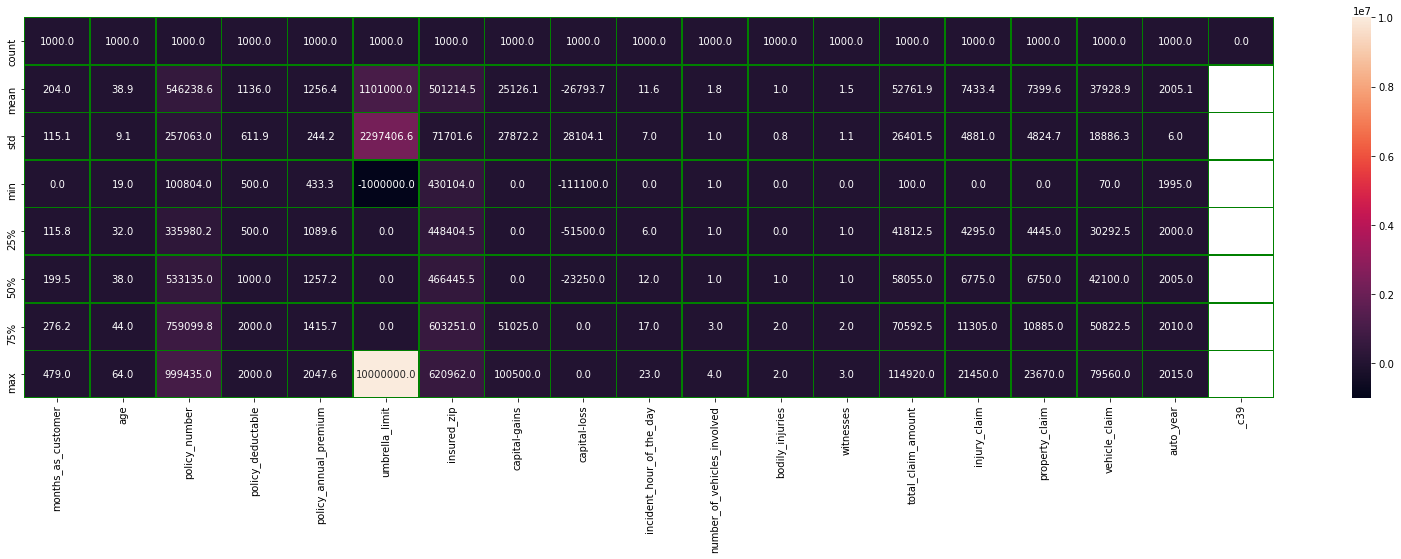

In [63]:
plt.figure(figsize=(28,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')
# Here Priting the Heat map of Describe.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [65]:
# As column _c39 has no value we drop the column
df=df.drop('_c39',axis=1)
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [66]:
# Here we find the number of rows containing '?'
(df=='?').astype(bool).sum(axis=0)

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [67]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [68]:
df['collision_type']=df['collision_type'].replace('?','None')
df['collision_type'][0:499]=df['collision_type'][0:499].replace('?','NO')
df['collision_type'][500:1000]=df['collision_type'][500:1000].replace('?','YES')
df['police_report_available'][0:499]=df['police_report_available'][0:499].replace('?','NO')
df['police_report_available'][500:1000]=df['police_report_available'][500:1000].replace('?','YES')# 
# Here we replace '?' with Mode of Column and police_report_available is fill with YES and NO. 

In [69]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date']=df['policy_bind_date'].map(dt.datetime.toordinal)
# Here column policy_bind_date is converted into date time data type.

# Skewness of Columns

umbrella_limit                 1.806712
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
policy_bind_date               0.046979
policy_number                  0.038991
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_hour_of_the_day      -0.035584
auto_year                     -0.048289
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64


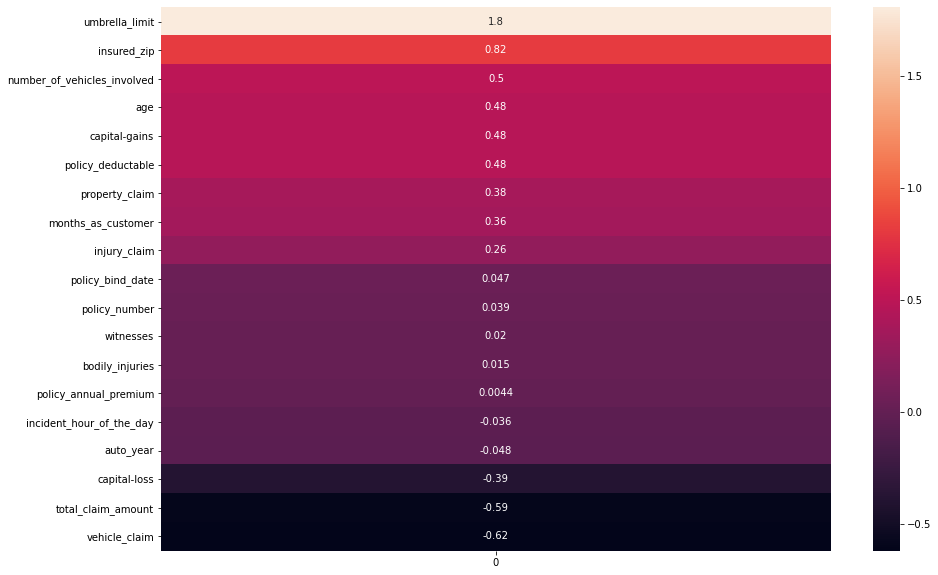

In [70]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(15,10))
sns.heatmap(skew1,annot=True)
plt.show()

# Correlation Heatmap

<AxesSubplot:>

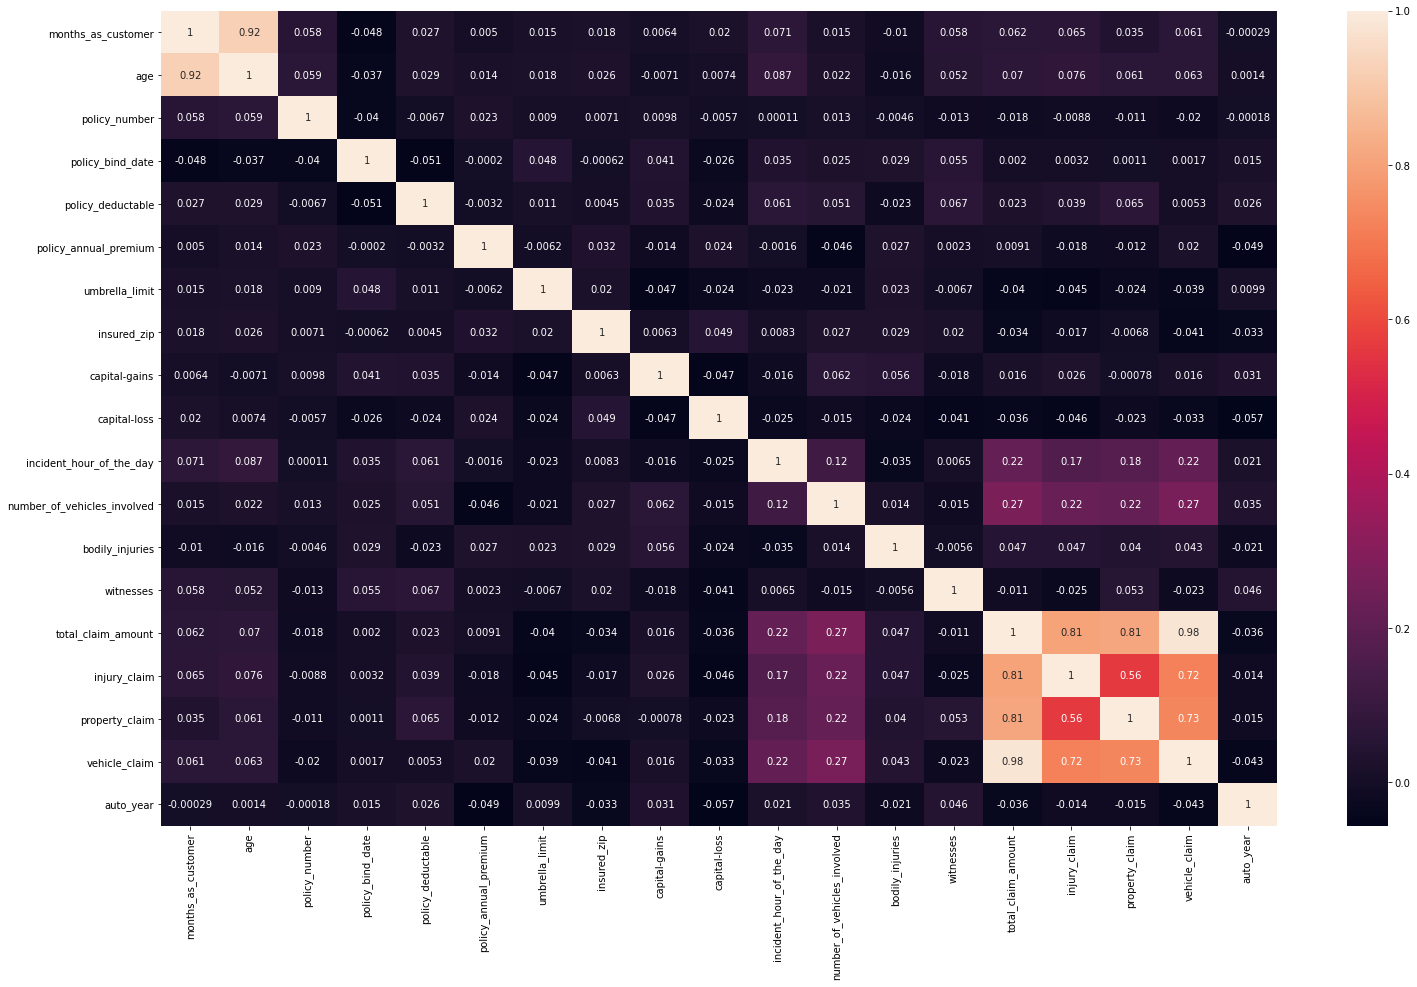

In [100]:
cor=df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

# Plots and Graphs

Rear Collision     292
Side Collision     276
Front Collision    254
None               178
Name: collision_type, dtype: int64


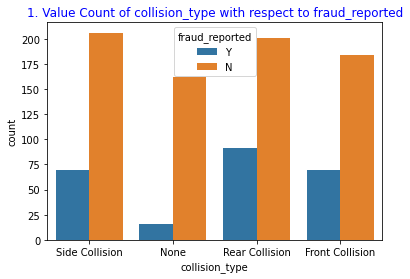

N    753
Y    247
Name: fraud_reported, dtype: int64


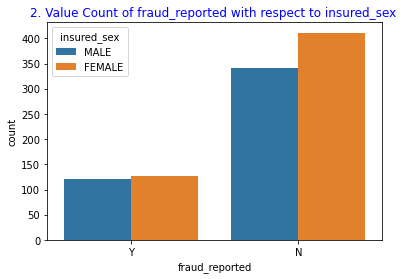

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


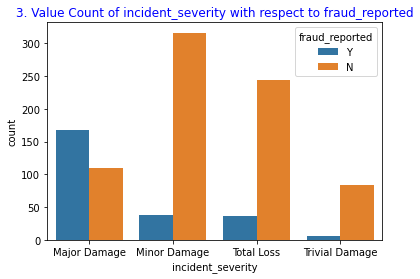

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


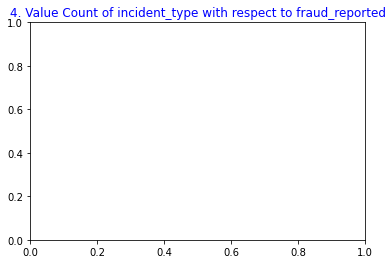

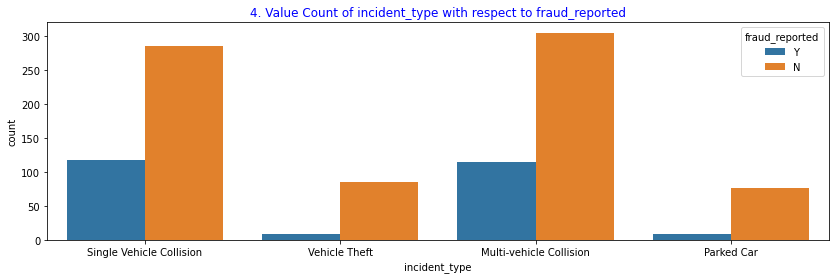

In [96]:
plt.title('1. Value Count of collision_type with respect to fraud_reported',color='blue')
print(df['collision_type'].value_counts())
sns.countplot(x='collision_type',data=df,hue='fraud_reported')
plt.show()
plt.title('2. Value Count of fraud_reported with respect to insured_sex ',color='blue')
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported',data=df,hue='insured_sex')
plt.show()
plt.title('3. Value Count of incident_severity with respect to fraud_reported',color='blue')
print(df['incident_severity'].value_counts())
sns.countplot(x='incident_severity',data=df,hue='fraud_reported')
plt.show()
plt.title('4. Value Count of incident_type with respect to fraud_reported',color='blue')
print(df['incident_type'].value_counts())
plt.figure(figsize=(14,4))
sns.countplot(x='incident_type',data=df,hue='fraud_reported')
plt.title('4. Value Count of incident_type with respect to fraud_reported',color='blue')
plt.show()

<AxesSubplot:xlabel='auto_make', ylabel='count'>

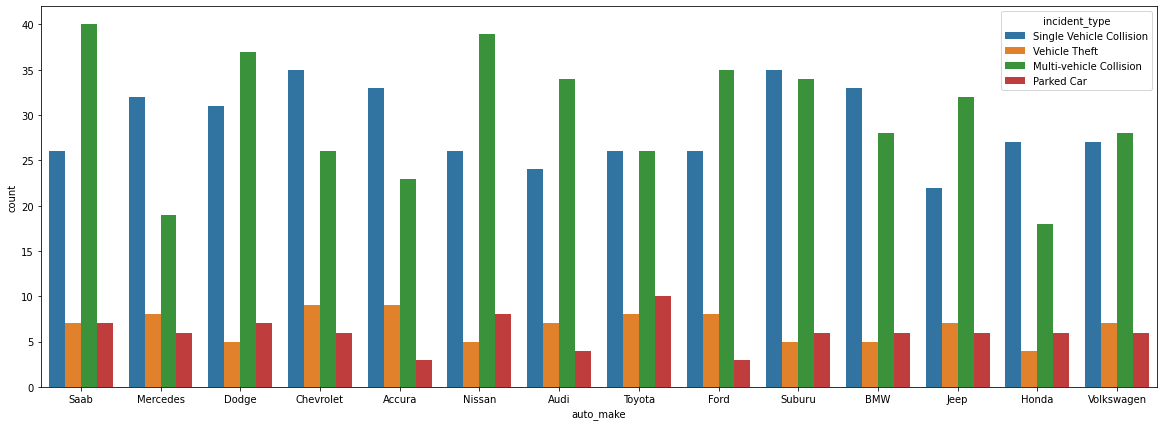

In [97]:
plt.figure(figsize=(20,7))
sns.countplot(x='auto_make',data=df,hue='incident_type')

<AxesSubplot:xlabel='age', ylabel='count'>

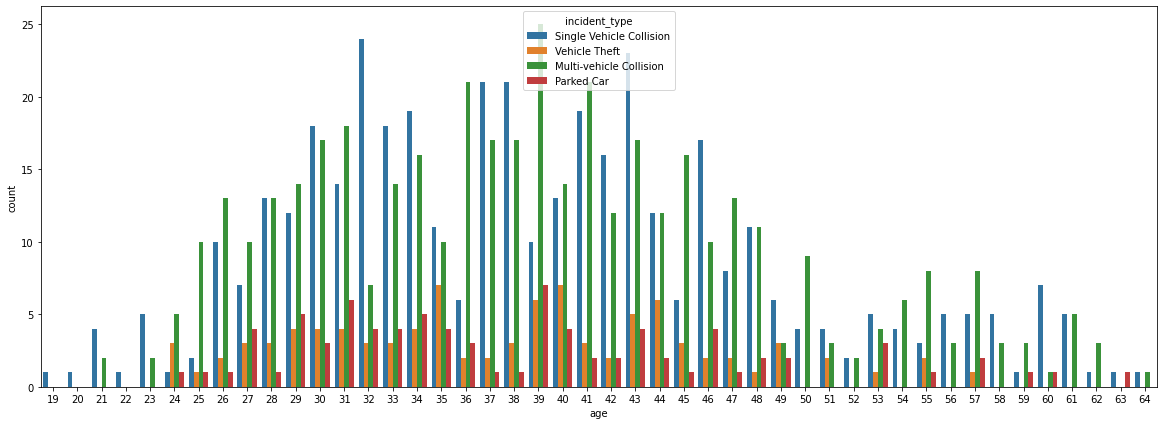

In [99]:
plt.figure(figsize=(20,7))
sns.countplot(x='age',data=df,hue='incident_type')

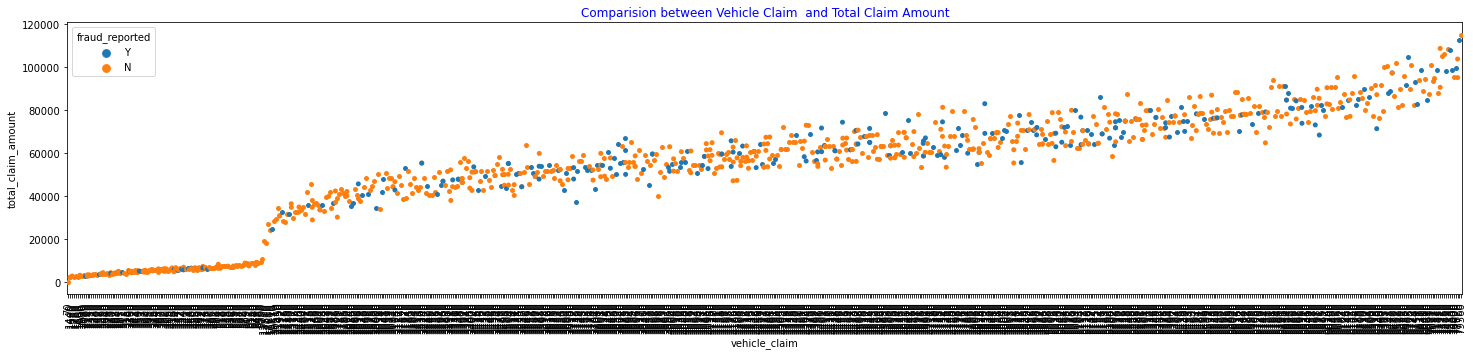

In [107]:
plt.figure(figsize=(25,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Vehicle Claim  and Total Claim Amount',color='blue')
sns.stripplot(x='vehicle_claim',y='total_claim_amount',data=df,hue='fraud_reported')
plt.show()

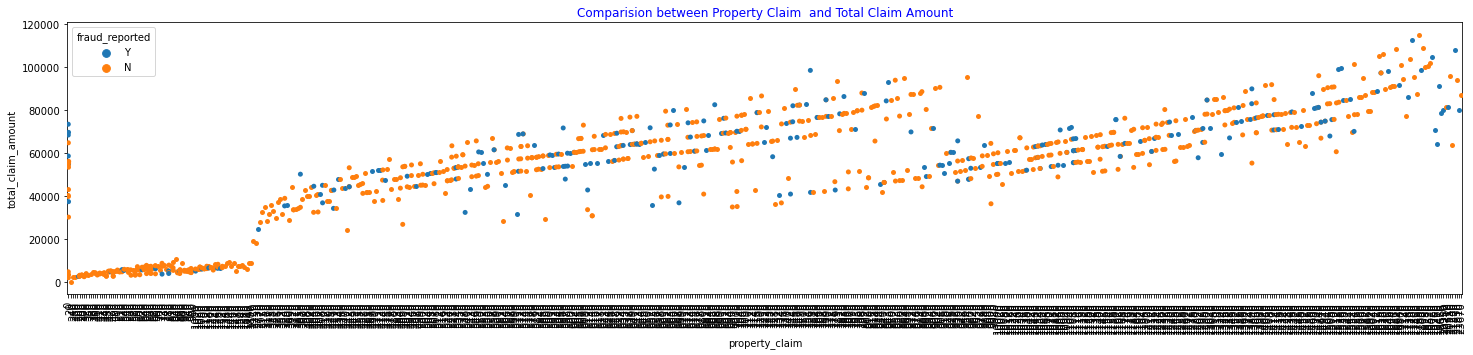

In [106]:
plt.figure(figsize=(25,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Property Claim  and Total Claim Amount',color='blue')
sns.stripplot(x='property_claim',y='total_claim_amount',data=df,hue='fraud_reported')
plt.show()

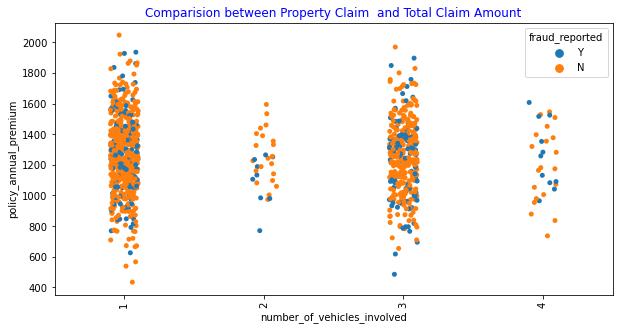

In [101]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Property Claim  and Total Claim Amount',color='blue')
sns.stripplot(x='number_of_vehicles_involved',y='policy_annual_premium',data=df,hue='fraud_reported')
plt.show()

<AxesSubplot:xlabel='total_claim_amount'>

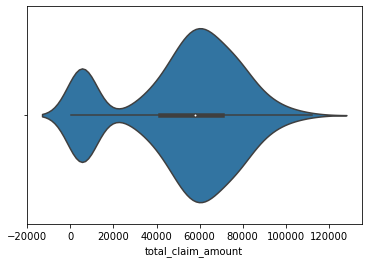

In [102]:
sns.violinplot(x='total_claim_amount',data=df,hue='fraud_reported')

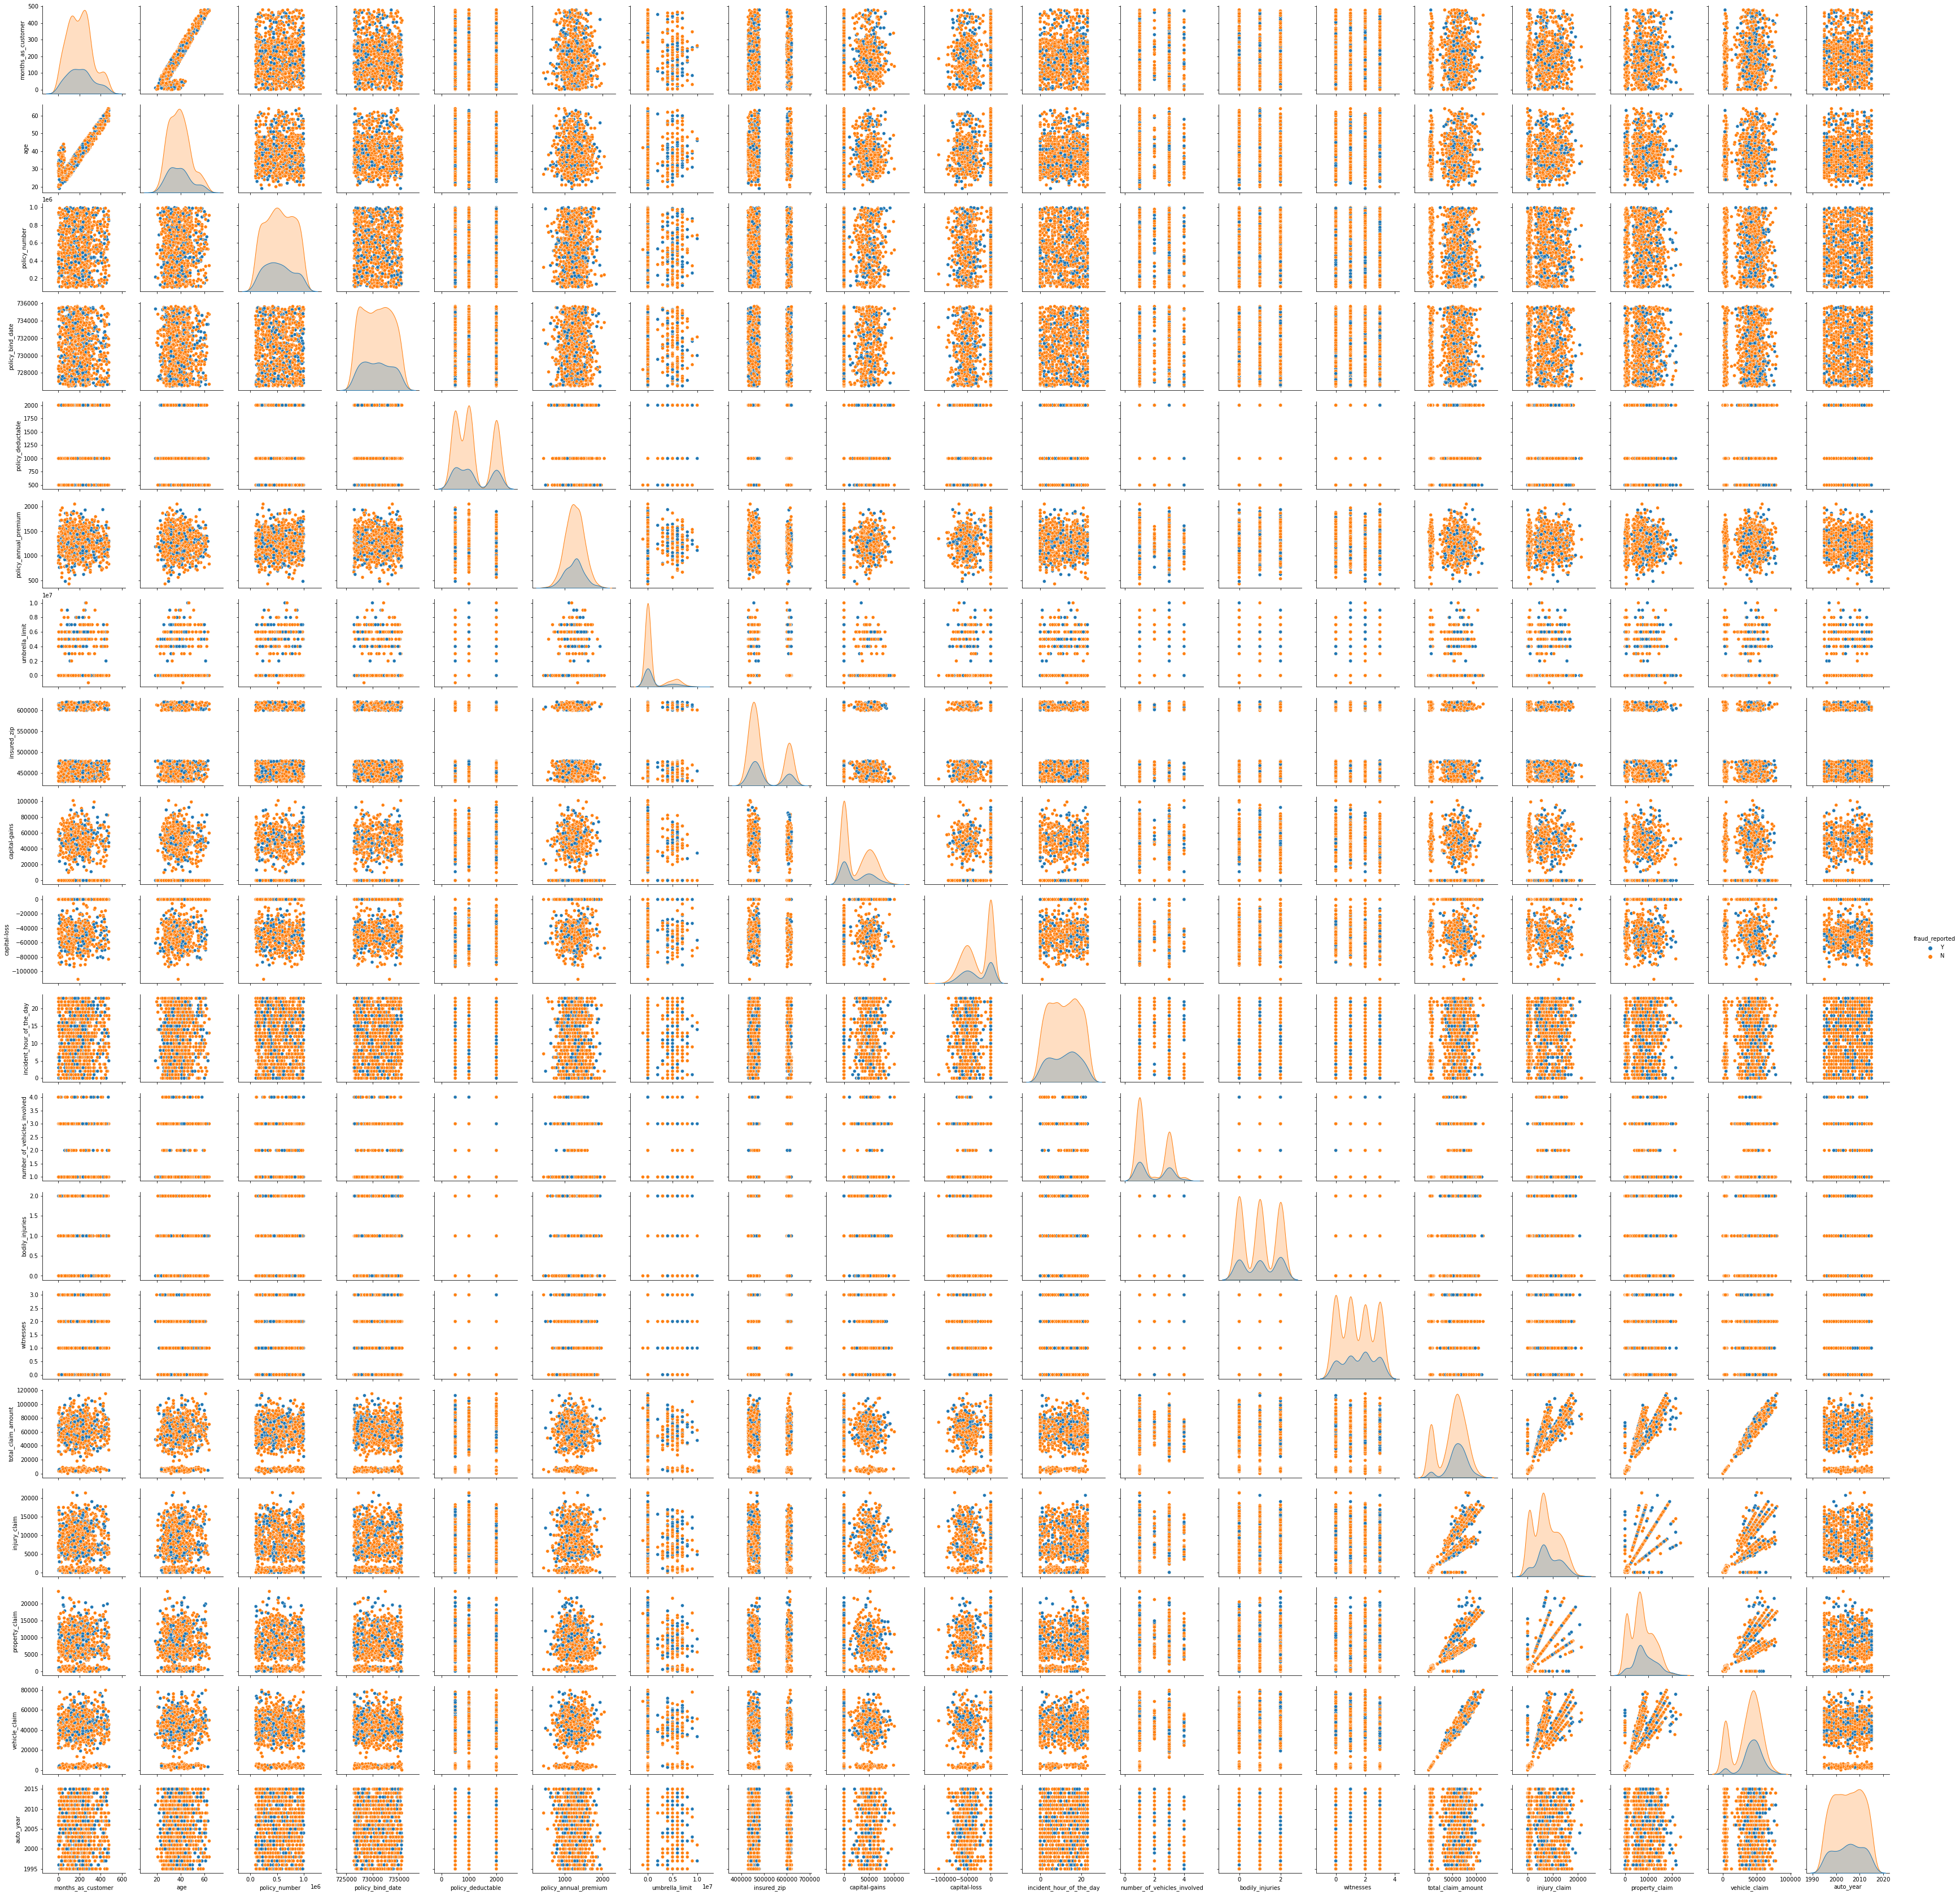

In [103]:
sns.pairplot(df,hue='fraud_reported')

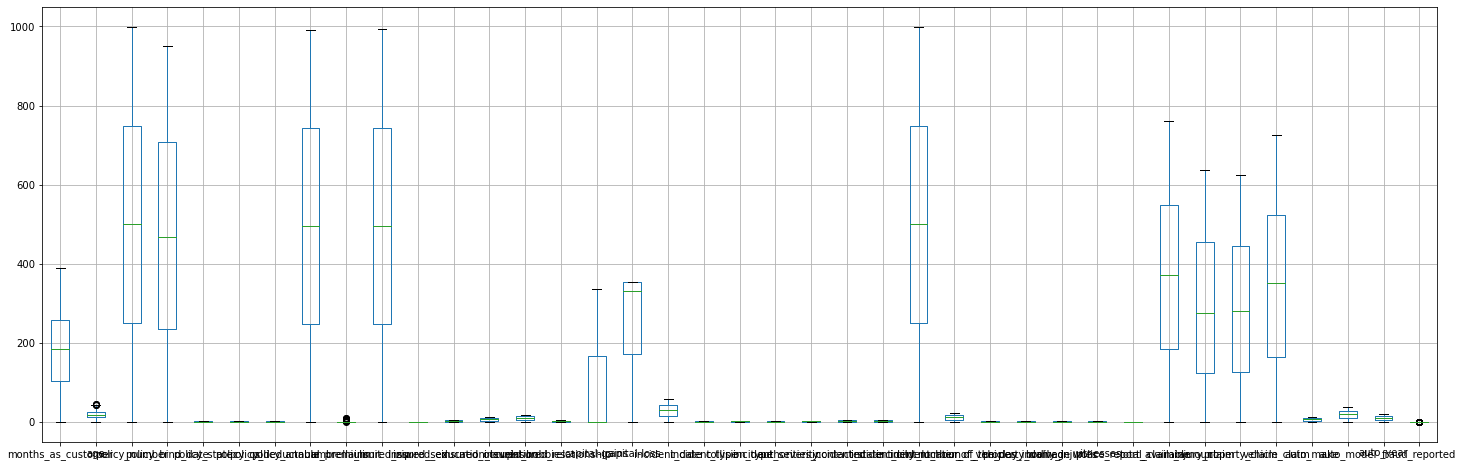

In [41]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
df.boxplot()
plt.show()

# Label Encoding Columns

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lenc=LabelEncoder()
for i in df.columns:
    df[i]=lenc.fit_transform(df[i])
df.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 299   29            480               941             2   
1                 212   23            257               639             1   
2                 123   10            672               405             2   
3                 239   22            140                19             0   
4                 212   25            286               926             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1                  1                    732               1   
1           1                  2                    396               5   
2           0                  2                    740               5   
3           1                  2                    743               6   
4           2                  1                    902               6   

   insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0          486  ...          2                        1                 563   
1          519  ...          0                        0                  44   
2            6  ...          3                        0                 143   
3          812  ...          2                        0                 451   
4          850  ...          1                        0                  81   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0           258             512            545         10           1   
1            46              45             38          8          12   
2           337             104            116          4          30   
3           245             249            521          3          34   
4            70              36             66          0          31   

   auto_year  fraud_reported  
0          9               1  
1         12               1  
2         12               0  
3         19               1  
4         14               0  

[5 rows x 39 columns]

# Train, Test Split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.drop(['fraud_reported'],axis=1)
print(x.shape)
y1=df['fraud_reported'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)

(1000, 38)
(1000, 1)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 38)
(200, 38)
(800, 1)
(200, 1)


# Since the Problem is of Classification Type We use Classifiers Model in Machine Learning

# 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [16]:
grid={"C":np.logspace(-3,3,7,9,11), "penalty":["none","l2","l1"]}# l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.008264462809917356, 'penalty': 'l2'}
accuracy : 0.745


In [125]:
lg=LogisticRegression(C=0.008264462809917356,penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test) 
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 75.5 Percentage
Confusion Matrix 
 [[151   4]
 [ 45   0]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.97      0.86       155
           1       0.00      0.00      0.00        45

    accuracy                           0.76       200
   macro avg       0.39      0.49      0.43       200
weighted avg       0.60      0.76      0.67       200



# 2. Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
grid= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc1=DecisionTreeClassifier()
dtc1_cv=GridSearchCV(dtc1,grid,cv=5)
dtc1_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",dtc1_cv.best_params_)
print("Accuracy :",dtc1_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
Accuracy : 0.8387499999999999


In [20]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 84.5 Percentage
Confusion Matrix 
 [[131  24]
 [  7  38]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.85      0.89       155
           1       0.61      0.84      0.71        45

    accuracy                           0.84       200
   macro avg       0.78      0.84      0.80       200
weighted avg       0.87      0.84      0.85       200



# 3. Support Vector Classifier

In [21]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [22]:
svm1=SVC()
gamma_range=[0.01, 0.1, 1, 10, 100]
c_range=[0.01, 0.1, 1, 10, 100]
grid= dict(gamma = gamma_range, C = c_range)
svm1_cv=GridSearchCV(svm1,grid,cv=5)
svm1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm1_cv.best_params_)
print("accuracy :",svm1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'gamma': 0.01}
accuracy : 0.7474999999999999


In [23]:
svc=SVC(C=0.01,gamma=0.01)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.775
Confusion Matrix [[155   0]
 [ 45   0]]
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200



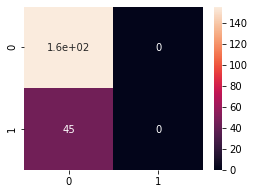

In [24]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predsvc),annot=True)
plt.show()

# 4. K-Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.775
Confusion Matrix 
 [[155   0]
 [ 45   0]]
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200



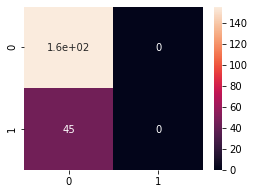

In [111]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predknn),annot=True)
plt.show()

# 5. Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc1=RandomForestClassifier()
parameters={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']
}
rfc_cv=GridSearchCV(rfc1,parameters,cv=10)
rfc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("Accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Accuracy : 0.7699999999999999


In [114]:
rfc=RandomForestClassifier(random_state=42,max_features='sqrt',criterion='entropy',max_depth=7,n_estimators=500)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.795
Confusion Matrix 
 [[146   9]
 [ 32  13]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.94      0.88       155
           1       0.59      0.29      0.39        45

    accuracy                           0.80       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.77      0.80      0.77       200



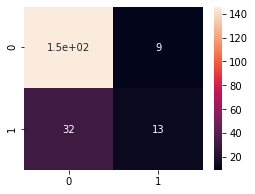

In [115]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predrfc),annot=True)
plt.show()

# 6. AdaBoost Classifier

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.835
Confusion Matrix 
 [[140  15]
 [ 18  27]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.90      0.89       155
           1       0.64      0.60      0.62        45

    accuracy                           0.83       200
   macro avg       0.76      0.75      0.76       200
weighted avg       0.83      0.83      0.83       200



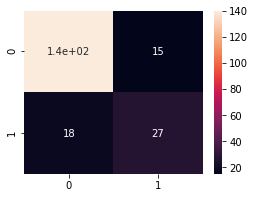

In [118]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predad),annot=True)
plt.show()

In [119]:
# Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression(C=121) = [0.77 0.77 0.74 0.74 0.76 0.74 0.75 0.75 0.76 0.75]
Mean Score of LogisticRegression(C=121) = 0.7529999999999999
Difference of Accuracy in LogisticRegression(C=121) and Cross Val Score of LogisticRegression(C=121) is= 0.007000000000000117


Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = [0.83 0.87 0.82 0.83 0.85 0.83 0.86 0.89 0.87 0.8 ]
Mean Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = 0.845
Difference of Accuracy in DecisionTreeClassifier(criterion='entropy', max_depth=4) and Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) is= 0.0


Cross Val Score of SVC(C=0.01, gamma=0.01) = [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.76 0.76 0.76]
Mean Score of SVC(C=0.01, gamma=0.01) = 0.7529999999999999
Difference of Accuracy in SVC(C=0.01, gamma=0.01) and Cross Val Score of SVC(C=0.01, gamma=0.01) is= 0.02200000000000013


Cross Val Score of KNeighborsClassifier(n_neighbors

# Conclusion

Here we see that Decision Tree Classifier gives the best Accuracy. Hence we save the model as dtc

# Saving the Model

In [122]:
import joblib

In [123]:
joblib.dump(dtc,'bankad.org')

['bankad.org']

In [124]:
bankfile=joblib.load('bankad.org')